In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# 데이터 준비

In [2]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = 5000)

In [3]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2,
                                                  random_state = 5)

In [4]:
train_seq = pad_sequences(x_train, maxlen = 100)
val_seq = pad_sequences(x_val, maxlen = 100)
test_seq = pad_sequences(x_test, maxlen = 100)

# 모델 구성

In [5]:
model = keras.Sequential()
model.add(keras.layers.Embedding(5000, 100, input_length = 100))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Conv1D(64, 5, activation = "relu"))
model.add(keras.layers.MaxPool1D(4))
model.add(keras.layers.LSTM(55))
model.add(keras.layers.Dense(1, activation = "sigmoid"))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          500000    
                                                                 
 dropout (Dropout)           (None, 100, 100)          0         
                                                                 
 conv1d (Conv1D)             (None, 96, 64)            32064     
                                                                 
 max_pooling1d (MaxPooling1  (None, 24, 64)            0         
 D)                                                              
                                                                 
 lstm (LSTM)                 (None, 55)                26400     
                                                                 
 dense (Dense)               (None, 1)                 56        
                                                        

In [10]:
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)
checkpoint_cb = keras.callbacks.ModelCheckpoint("./model/cnnrnn-model.h5",
                                                save_best_only = True)

In [11]:
history = model.fit(train_seq, y_train, batch_size = 128, epochs = 50,
                    validation_data = (val_seq, y_val),
                    callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/50


157/157 [==============================] - 13s 66ms/step - loss: 0.5061 - accuracy: 0.7269 - val_loss: 0.3880 - val_accuracy: 0.8232
Epoch 2/50
  2/157 [..............................] - ETA: 11s - loss: 0.3020 - accuracy: 0.8672

C:\ProgramData\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


157/157 [==============================] - 10s 65ms/step - loss: 0.3102 - accuracy: 0.8686 - val_loss: 0.3275 - val_accuracy: 0.8616
Epoch 3/50
157/157 [==============================] - 10s 65ms/step - loss: 0.2614 - accuracy: 0.8928 - val_loss: 0.3389 - val_accuracy: 0.8566
Epoch 4/50
157/157 [==============================] - 11s 73ms/step - loss: 0.2220 - accuracy: 0.9129 - val_loss: 0.3211 - val_accuracy: 0.8668
Epoch 5/50
157/157 [==============================] - 10s 67ms/step - loss: 0.1933 - accuracy: 0.9273 - val_loss: 0.3355 - val_accuracy: 0.8660
Epoch 6/50
157/157 [==============================] - 10s 65ms/step - loss: 0.1578 - accuracy: 0.9431 - val_loss: 0.3472 - val_accuracy: 0.8594
Epoch 7/50
157/157 [==============================] - 10s 63ms/step - loss: 0.1267 - accuracy: 0.9569 - val_loss: 0.3921 - val_accuracy: 0.8552


In [12]:
model.evaluate(test_seq, y_test)

782/782 [==============================] - 6s 8ms/step - loss: 0.3447 - accuracy: 0.8515


[0.34465867280960083, 0.8515200018882751]

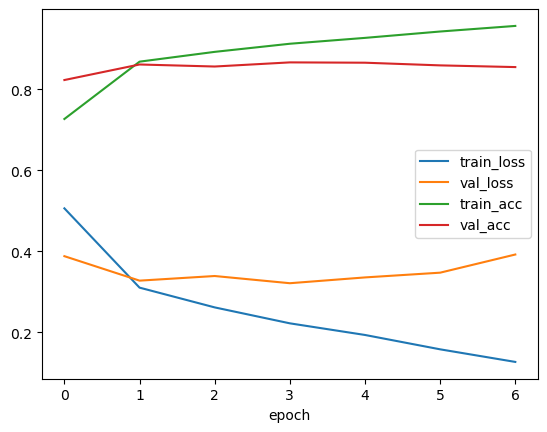

In [13]:
plt.figure()

plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["accuracy"], label = "train_acc")
plt.plot(history.history["val_accuracy"], label = "val_acc")

plt.xlabel("epoch")
plt.legend()
plt.show()